In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import statistics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

In [3]:
# reading the cleaned dataset csv
prediction_df= pd.read_csv('prediction_df.csv')
prediction_df=prediction_df[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]
prediction_df.head()

,team1,team2,team1_toss_win,team1_bat,team1_win,venue
0,13,12,0.0,0,0.0,28
1,8,11,0.0,0,0.0,21
2,4,7,0.0,0,0.0,31
3,11,5,0.0,0,0.0,13
4,12,3,1.0,1,0.0,17


In [4]:
# dropping higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
print(correlation_matrix)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
prediction_df.drop(columns=correlated_features).head() 

                   team1     team2  team1_toss_win  team1_bat     venue
team1           1.000000 -0.107006       -0.119418  -0.119418  0.108539
team2          -0.107006  1.000000       -0.010893  -0.010893  0.081898
team1_toss_win -0.119418 -0.010893        1.000000   1.000000  0.049083
team1_bat      -0.119418 -0.010893        1.000000   1.000000  0.049083
venue           0.108539  0.081898        0.049083   0.049083  1.000000


,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,0.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,12,3,1.0,0.0,17


In [5]:
# setting the features and target columns
X = prediction_df.drop('team1_win', axis=1)
y = prediction_df['team1_win']
y=y.astype(int)

In [6]:
#Checking for the features if they are important

logReg=LogisticRegression(solver='lbfgs')
rfe = RFE(logReg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)

[ True  True  True  True  True]


In [7]:
prediction_df['team1_win'].value_counts()

0.0    646
1.0    110
Name: team1_win, dtype: int64

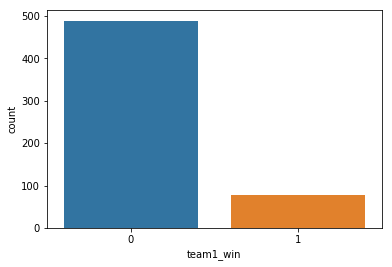

In [19]:
sns.countplot(y_train)
plt.show()

In [8]:
# Split into training and test sets Percentage Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [9]:
sm= SMOTE()

In [10]:
smote_x_train, smote_y_train = sm.fit_sample(X_train.astype('float'), y_train)

In [17]:
from collections import Counter
print('Before SMOTE : ', Counter(y_train))
print('After SMOTE : ', Counter(smote_y_train))

Before SMOTE :  Counter({0: 489, 1: 78})
After SMOTE :  Counter({0: 489, 1: 489})


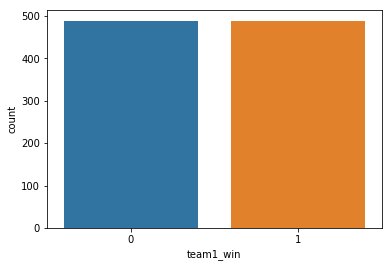

In [18]:
sns.countplot(smote_y_train)
plt.show()

In [31]:
# models
logreg = LogisticRegression()
rf=RandomForestClassifier(n_estimators=1000)
svm=SVC()
dtree=DecisionTreeClassifier()
knn =KNeighborsClassifier(n_neighbors=1)

# lists
score_logreg=[]
score_logreg_smote=[]
score_rf=[]
score_rf_smote=[]
score_svm=[]
score_svm_smote=[]
score_dtree=[]
score_dtree_smote=[]
score_knn=[]
score_knn_smote=[]
print('ACCURACY SCORES \n\n')
print('Logistic Regression :-\n\n')
Accuracy_scores(logreg, score_logreg, score_logreg_smote)
print('RandomForestClassifier :-\n\n')
Accuracy_scores(rf, score_rf, score_rf_smote)
print('SVC :-\n\n')
Accuracy_scores(svm, score_svm, score_svm_smote)
print('DecisionTreeClassifier :-\n\n')
Accuracy_scores(dtree, score_dtree, score_dtree_smote)
print('KNeighborsClassifier :-\n\n')
Accuracy_scores(knn, score_knn, score_knn_smote)

ACCURACY SCORES 


Logistic Regression :-


%split : 83.60% 

%split-Smote : 84.56% 

Before and After Resampling 

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       166
           1       0.38      0.52      0.44        23

    accuracy                           0.84       189
   macro avg       0.65      0.70      0.67       189
weighted avg       0.86      0.84      0.85       189

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       127
           1       0.81      0.42      0.55        62

    accuracy                           0.78       189
   macro avg       0.79      0.69      0.70       189
weighted avg       0.78      0.78      0.75       189

SKFold : 83.60% 

SKFold-Smote : 78.13% 
----------------------------------------------------------------------


RandomForestClassifier :-


%split : 82.01% 

%split-Smote : 98.67% 

Before and After Resampling 

              pr

C:\Users\pratik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pratik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pratik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       159
           1       0.75      0.80      0.77        30

    accuracy                           0.93       189
   macro avg       0.86      0.87      0.86       189
weighted avg       0.93      0.93      0.93       189

SKFold : 81.31% 

SKFold-Smote : 93.47% 
----------------------------------------------------------------------


KNeighborsClassifier :-


%split : 80.42% 

%split-Smote : 98.47% 

Before and After Resampling 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       158
           1       0.41      0.42      0.41        31

    accuracy                           0.80       189
   macro avg       0.65      0.65      0.65       189
weighted avg       0.81      0.80      0.81       189

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       155
           1       0.75  

In [30]:
skf= StratifiedKFold(n_splits=3, random_state=5, shuffle=True)
def Accuracy_scores(model, score_model, score_model_smote):
    model.fit(X_train, y_train)
    print('%split : {:.2f}% \n'.format(model.score(X_test, y_test)*100))
    
    model.fit(smote_x_train, smote_y_train)    
    print('%split-Smote : {:.2f}% \n'.format(model.score(smote_x_train, smote_y_train)*100))
    
    #Splitting the data into training and testing data and scaling it using StratifiedKFold
    for train_index, test_index in skf.split(X,y):
        X_train1, X_test1 = X.loc[train_index], X.loc[test_index]
        y_train1, y_test1 =y.loc[train_index], y.loc[test_index]
        model.fit(X_train, y_train)
        nor_preds = model.predict(X_test)
        score_model.append(model.score(X_test, y_test))

        smote_x_train1, smote_y_train1 = sm.fit_sample(X_train1.astype('float'), y_train1)
        model.fit(smote_x_train1, smote_y_train1)
        smote_preds = model.predict(X_test)
        score_model_smote.append(model.score(X_test, y_test))
    print('Before and After Resampling \n')
    print(classification_report(nor_preds, y_test))
    print(classification_report(smote_preds, y_test))
    print('SKFold : {:.2f}% \n'.format(statistics.mean(score_model)*100))
    print('SKFold-Smote : {:.2f}% '.format(statistics.mean(score_model_smote)*100))    
    print('----------------------------------------------------------------------')
    print('\n')